In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, sesolve, ket2dm)
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

%matplotlib inline

In [2]:
##define all of the parameters
Delta1 = 0
Delta2 = 0
Delta3 = 0
Alpha12 = 1
Alpha23 = 1
Alpha31 = 1
Phi = 0*np.pi / 2

##define the basis states
One = Qobj([[1], [0], [0]])
Two = Qobj([[0], [1], [0]])
Three = Qobj([[0], [0], [1]])

##define the Hamiltonian
H = Qobj([
    [Delta1, Alpha12, Alpha31*np.exp(1j * Phi)],
    [Alpha12, 0, Alpha23],
    [Alpha31*np.exp(-1j*Phi), Alpha23, Delta3]
])

In [3]:
#Simulate

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 1001)

#convert to density matrices
dmOne = ket2dm(One)
dmTwo = ket2dm(Two)
dmThree = ket2dm(Three)

InitialStates = [One,Two,Three]
dmStates = [dmOne,dmTwo,dmThree]

Results = []
for i in range(np.size(dmStates)):
    Results.append(sesolve(H, (One-Three) / np.sqrt(2), tlist, e_ops=[dmStates[i]])) #finding the expectation value of dmStates[i]

#get an array of the probabilities of being in each state
Probs = []
for i in range(np.size(Results)):
    Probs.append(Results[i].expect[0])

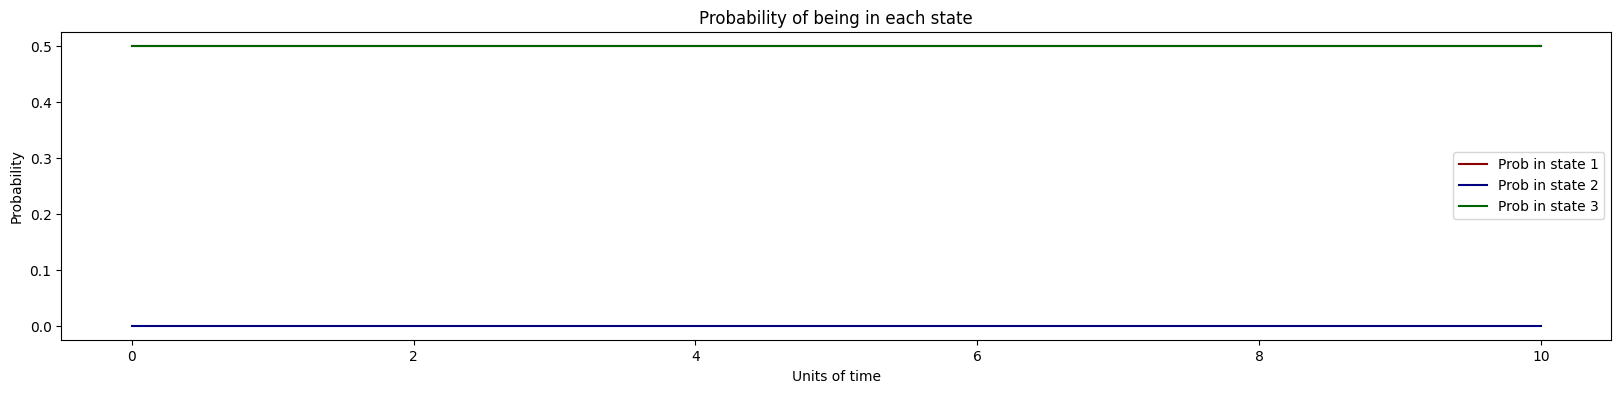

In [4]:
#in the Minus, Two, Plus basis
plt.figure(figsize=(20,4))

plt.plot(tlist,Probs[0], color='darkred', label = 'Prob in state 1')
plt.plot(tlist,Probs[1], color='navy', label = 'Prob in state 2')
plt.plot(tlist,Probs[2], color='darkgreen', label = 'Prob in state 3')

plt.legend()
plt.title('Probability of being in each state')
plt.ylabel('Probability')
plt.xlabel('Units of time')
plt.show()